In [1]:
import pandas as pd

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_grad_pres.csv')

In [3]:
# Cria o DataFrame completo, com todos os dados do arquivo dataset_grad_pres.csv

df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [4]:
########################### TABELA ##################
# Grupo / Baixa renda / Escola Pública /  Etnia-PPI / PCD
# Grupo A sim sim sim não
# Grupo A1 sim sim sim sim
# Grupo B sim sim não não
# Grupo B1 sim sim não sim
# Grupo C não não não não
# Grupo D não sim sim não
# Grupo D1 não sim  sim sim
# Grupo E não sim não não
# Grupo E1 não sim não sim

In [5]:
# Inclui no final do DataFrame df_completo as colunas:
# Baixa renda; Escola pública; Etnia; PPI; PCD
# e preenche seus valores com "Sim" ou "Não", de acordo com a tabela acima

def classificar_baixa_renda(cota):
    baixa_renda_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1"]

    if cota in baixa_renda_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Baixa renda'] = df_completo['COTA'].apply(classificar_baixa_renda)

def classificar_escola_publica(cota):
    escola_publica_categorias = ["Grupo A", "Grupo A1", "Grupo B", "Grupo B1", "Grupo D", "Grupo D1", "Grupo E", "Grupo E1"]

    if cota in escola_publica_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Escola pública'] = df_completo['COTA'].apply(classificar_escola_publica)

def classificar_etnia_PPI(cota):
    etnia_ppi_categorias = ["Grupo A", "Grupo A1", "Grupo D", "Grupo D1"]

    if cota in etnia_ppi_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['Etnia PPI'] = df_completo['COTA'].apply(classificar_etnia_PPI)

def classificar_PCD(cota):
    pcd_categorias = ["Grupo A1", "Grupo B1", "Grupo D1", "Grupo E1"]

    if cota in pcd_categorias:
        return "Sim"
    else:
        return "Não"

df_completo['PCD'] = df_completo['COTA'].apply(classificar_PCD)

In [6]:
# Para visualizar os 5 primeiros registros do DataFrame completo, retire o # do início da linha abaixo

df_completo.head()

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD
0,2008,1,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,"-43,3646367","-21,7531292","VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
1,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,"-43,4042512","-21,8043129","PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não
2,2008,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,"-43,3585569","-21,7500694","SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
3,2008,1,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-44,2857937","-21,718564","ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
4,2008,1,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,"-42,9806087","-20,850899","PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não


In [7]:
# DataFrame somente com alunos que ingressaram de 2013 em diante

df_ingressantes_apos_2012 = df_completo.loc[(df_completo['ANO_INGRESSO'] > 2012)]

In [8]:
# Para visualizar os 5 primeiros registros do DataFrame somente com alunos que ingressaram de 2013 em diante, retire o # do início da linha abaixo
df_ingressantes_apos_2012.head()

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD
69,2015,2,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Aluno sem matrícula,JUIZ DE FORA,INTEGRAL,...,"-43,3433999","-21,7624237","CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
83,2013,1,SiSU,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,"-43,3216191","-21,772335","TIGUERA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
84,2013,1,SiSU,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,"-43,1779137","-22,5112638","PETROPOLIS, RJ, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
85,2013,1,PISM,Grupo C,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,"-43,3473578","-21,776524","ALTO DOS PASSOS, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
86,2013,1,SiSU,Grupo D,ABI - CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Desistência,JUIZ DE FORA,INTEGRAL,...,"-43,3546589","-21,7740891","SAO MATEUS, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Sim,Sim,Não


In [9]:
# Mantém no DataFrame df_ingressantes_apos_2012 apenas os alunos que ingressaram por SiSU ou PISM

df_ingressantes_apos_2012 = df_ingressantes_apos_2012.loc[(df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM') 
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
            | (df_ingressantes_apos_2012['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')]

In [10]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "ABI -" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("ABI -", regex=False)]

In [11]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "OPÇÃO 2º CICLO CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("OPÇÃO 2º CICLO CIÊNCIAS EXATAS", regex=False)]

In [12]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "BACHARELADO INTERDISCIPLINAR" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("BACHARELADO INTERDISCIPLINAR", regex=False)]

In [13]:
# Retira do DataFrame df_ingressantes_apos_2012 os cursos que contêm "CIÊNCIAS EXATAS" no nome
# REGISTRAR AQUI POR QUE RESOLVEMOS ELIMINAR ESSES REGISTROS

df_ingressantes_apos_2012 = df_ingressantes_apos_2012[~df_ingressantes_apos_2012['CURSO_NOME'].str.contains("CIÊNCIAS EXATAS", regex=False)]

In [14]:
# DataFrame de alunos evadidos de 2013 em diante
df_evadidos = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == 'Evadido']

# Quantidade de evadidos por curso
qtt_evadidos_por_curso = df_evadidos['CURSO_NOME'].value_counts()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

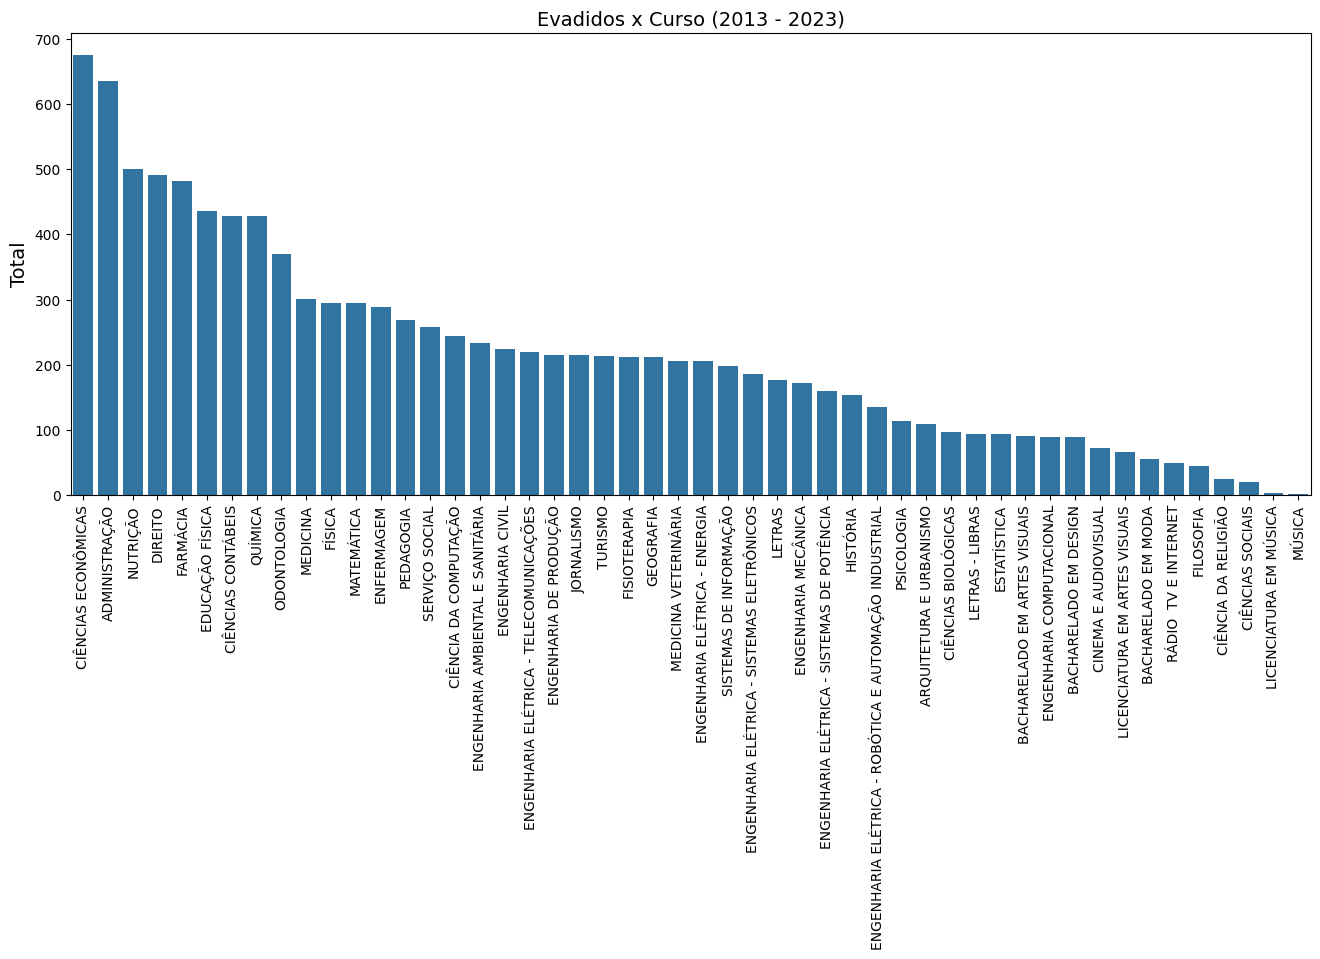

In [16]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=qtt_evadidos_por_curso.index, 
                y=qtt_evadidos_por_curso)

axes.set_title('Evadidos x Curso (2013 - 2023)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [17]:
def calcular_qtt_situacao(df_ingressantes_apos_2012, filtro, situacao):
    df = df_ingressantes_apos_2012.loc[df_ingressantes_apos_2012['SITUACAO'] == situacao]
    return df.groupby('CURSO_NOME')[filtro].value_counts()

In [18]:
# EXPLICAR O QUE A FUNÇÃO ABAIXO FAZ 

def evadido_vs_ingressante_por_filtro(df_ingressantes, filtro):
    #calcular uma série com o número de alunos, evadidos, número de concluídos e número de ativos
    qtt_filtro_por_curso = df_ingressantes.groupby('CURSO_NOME')[filtro].value_counts()
    qtt_evadidos_por_filtro = calcular_qtt_situacao(df_ingressantes, filtro, 'Evadido')
    qtt_concluidos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Concluido')
    qtt_ativos_por_filtro =  calcular_qtt_situacao(df_ingressantes, filtro, 'Ativo')
    
    #cruzamento das Series criadas anterioresmente    
    df = pd.merge(qtt_filtro_por_curso, qtt_evadidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('_total', '_evadidos')).fillna(0)
    df = pd.merge(df, qtt_concluidos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_concluintes')).fillna(0)
    df = pd.merge(df, qtt_ativos_por_filtro, 
                                      how='left', on=['CURSO_NOME', filtro], suffixes=('', '_ativos')).fillna(0)
    df = df.rename(columns={'count': 'count_concluintes'}).sort_values(filtro)

    #calculando os percentuais
    df['pct_evasao'] = df['count_evadidos']/df['count_total']
    df['pct_concluido'] = df['count_concluintes']/df['count_total']
    df['pct_ativo'] = df['count_ativos']/df['count_total']
   
    return df

In [19]:
# EXPLICAR O QUE A FUNÇÃO FAZ 

def cota_por_curso(evadido_vs_ingressante, curso):
    
    ax = evadido_vs_ingressante[['count_evadidos', 'count_concluintes', 'count_ativos']].loc[curso].plot(kind='bar', stacked=True, figsize=[10,6])
    
    df = evadido_vs_ingressante.loc[curso]
    
    for i, eixo_x in enumerate(ax.get_xticklabels()):
        
        linha = int(eixo_x.get_text()) if eixo_x.get_text().isdigit() else eixo_x.get_text()
        
        pct_evasao_float = df['pct_evasao'].loc[linha]
        pct_evasao_str = f"{pct_evasao_float:.2%}"
        altura_y_evadidos = df['count_evadidos'].loc[linha]
        
        pct_concluintes_float = df['pct_concluido'].loc[linha]
        pct_concluintes_str = f"{pct_concluintes_float:.2%}"
        altura_y_concluintes = df['count_concluintes'].loc[linha]
        
        pct_ativos_float = df['pct_ativo'].loc[linha]
        pct_ativos_str = f"{pct_ativos_float:.2%}"
        altura_y_ativos = df['count_ativos'].loc[linha]
        
        if pct_evasao_float >= 0.05:
            ax.annotate(pct_evasao_str, xy=(i, altura_y_evadidos), rotation=45)
        
        if pct_concluintes_float >= 0.05:
            ax.annotate(pct_concluintes_str, xy=(i, altura_y_evadidos + altura_y_concluintes), rotation=45)
            
        if pct_ativos_float >= 0.05:
            ax.annotate(pct_ativos_str, xy=(i, altura_y_evadidos + altura_y_concluintes + altura_y_ativos), rotation=45)

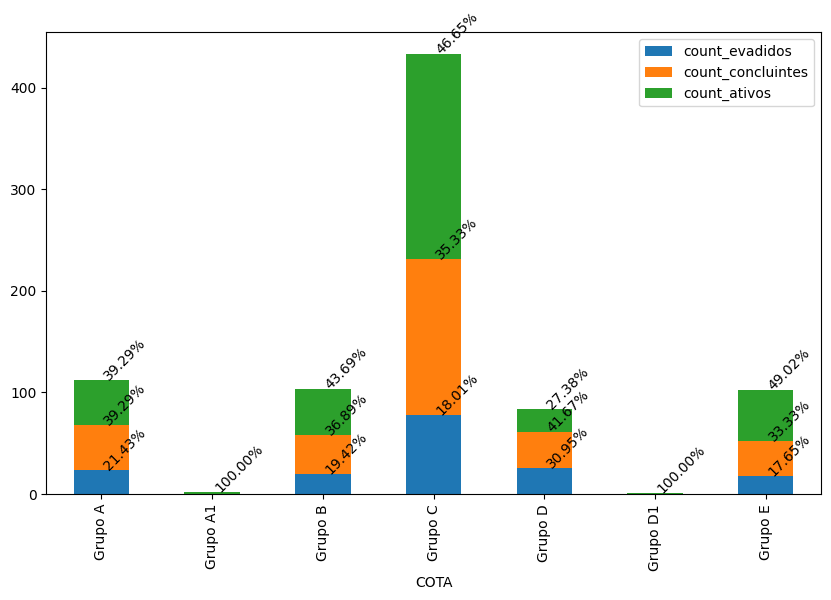

In [20]:
# Para gerar um gráfico que mostra a relação entre ingressantes e evadidos por curso, 
# incluindo qualquer outra coluna do DataFrame df_ingressantes_apos_2012,
# substitua as variáveis abaixo (coluna e curso)

coluna = "COTA"
curso = "LETRAS"

cota_por_curso(evadido_vs_ingressante_por_filtro(df_ingressantes_apos_2012, coluna), curso)

In [44]:
df_ingressantes_apos_2012.head(10)

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LNG,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD
410,2013,1,SiSU,Grupo E,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,"-43,3433999","-21,7624237","CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Sim,Não,Não
411,2013,1,PISM,Grupo A,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,4235324","-21,7124497","NOVA ERA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Sim,Não
412,2013,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,3433999","-21,7624237","CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
413,2013,1,SiSU,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,3529992","-21,7431062","MANOEL HONORIO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
414,2013,1,SiSU,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,3546589","-21,7740891","SAO MATEUS, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
415,2013,1,SiSU,Grupo D,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,3815506","-21,7732997","SAO PEDRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Sim,Sim,Não
416,2013,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,"-43,3406699","-21,7761159","BOM PASTOR, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
417,2013,1,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,3433999","-21,7624237","CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não
419,2013,1,SiSU,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,3433999","-21,7624237","CENTRO, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não
420,2013,1,SiSU,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,"-43,7069087","-22,246015","VALENCA, RJ, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não


In [45]:
df_ingressantes_apos_2012.info

<bound method DataFrame.info of        ANO_INGRESSO  SEMESTRE_INGRESSO TIPO_INGRESSO     COTA  \
410            2013                  1          SiSU  Grupo E   
411            2013                  1          PISM  Grupo A   
412            2013                  1          PISM  Grupo C   
413            2013                  1          SiSU  Grupo C   
414            2013                  1          SiSU  Grupo C   
...             ...                ...           ...      ...   
64535          2023                  1          SiSU  Grupo A   
64536          2023                  1          SiSU  Grupo C   
64537          2023                  1          SiSU  Grupo C   
64538          2023                  1          PISM  Grupo B   
64539          2023                  1          PISM  Grupo D   

                  CURSO_NOME                         AREA   SITUACAO  \
410      CIÊNCIAS BIOLÓGICAS          Ciências Biológicas    Evadido   
411      CIÊNCIAS BIOLÓGICAS          Ciênc

In [43]:
frequency_table = pd.crosstab(df_ingressantes_apos_2012['SEXO'], df_ingressantes_apos_2012['SITUACAO'], margins=True, margins_name='Total')
print(frequency_table)

SITUACAO  Ativo  Concluido  Evadido  Total
SEXO                                      
F          9428       5449     5271  20148
M          6962       3562     5560  16084
Total     16390       9011    10831  36232


In [38]:
frequency_table2 = pd.crosstab(df_ingressantes_apos_2012['SEXO'], df_ingressantes_apos_2012['SITUACAO'], margins=False)


somas_por_linha = frequency_table2.sum(axis=1)
somas_por_coluna = frequency_table2.sum()

# Criar uma tabela de proporções por linha dividindo cada valor pelo total da linha correspondente
tabela_proporcoes_por_linha = frequency_table2.divide(somas_por_linha, axis=0)

# Calcular as proporções das margens por linha
proporcoes_margens_por_linha = somas_por_coluna / somas_por_coluna.sum()

# Adicionar uma coluna de margens à tabela de proporções por linha
tabela_proporcoes_por_linha['Margem'] = proporcoes_margens_por_linha

# Adicionar uma linha de margens à tabela de proporções por linha
tabela_proporcoes_por_linha.loc['Margem'] = proporcoes_margens_por_linha

# Imprimir a tabela de proporções com margens por linha
print(tabela_proporcoes_por_linha)

SITUACAO     Ativo  Concluido   Evadido  Margem
SEXO                                           
F         0.467937   0.270449  0.261614     NaN
M         0.432853   0.221462  0.345685     NaN
Margem    0.452363   0.248703  0.298935     NaN


In [36]:
from scipy.stats import chi2_contingency

In [42]:
chi2, p, dof, expected = chi2_contingency(frequency_table2)

# Imprimir os resultados
print("Estatística de Qui-Quadrado:", chi2)
print("Valor-p:", p)
print("Graus de Liberdade:", dof)
print("...............")
print("Tabela de Contingência Esperada:")
print(expected)


Estatística de Qui-Quadrado: 322.1074669592016
Valor-p: 1.1356702780602672e-70
Graus de Liberdade: 2
...............
Tabela de Contingência Esperada:
[[9114.20070656 5010.86409803 6022.93519541]
 [7275.79929344 4000.13590197 4808.06480459]]
